# DS 1. Pandas 数据分析

> 本文是实战导向的教程，使用 python 外加 Numpy, Pandas, Matplotlib, Seaborn, SK-learn 等 python 库。
> - 教程的来源为: [Youtube, FreeCodeCamp | Data Analysis with Python](https://www.youtube.com/watch?v=r-uOLxNrNk8&t=1s&ab_channel=freeCodeCamp.org)
> - 本文中所涉及的代码的 Github 地址为: [FreeCodeCamp-Pandas-Real-Life-Example
](https://github.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Lecture_1.ipynb)
> - 数据集的地址：[sales_data.csv](https://github.com/Alexbeast-CN/Uob_Robotics/blob/main/Intro2AI/2DS/Lec1/sales_data.csv%20-%20sales_data.csv)
> 

现在我们被要求分析一下一家自动车网店的销售情况。店家给了我们一份 csv 文件，下面我们就要对文件中的数据进行可视化分析了。

![](./pics/blue.png)

## 1. 加载数据

首先导入 numpy, pandas, 和 matplotlib 库。然后使用 `pd.read_csv()` 将 `.csv` 文件导入 python。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
sales = pd.read_csv(
    './sales_data.csv',
    parse_dates=['Date'])

![](./pics/green.png)

## 2. 查看数据

为了对数据有一个直观的印象，我们使用 `head()` 将数据的前几行进行打印出来：

In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


我们现在大概了解了数据的情况后，再使用 `shape()` 来查看一下数据集的大小：

In [6]:
sales.shape

(113036, 18)

这个数据集里共有 113036 条数据，每条数据都有 18 个特征值。但只有这个太抽象了，我们还是希望可以查看到数据集的更多信息，于是使用 `info()`：

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

如果想要数据性的描述的话，使用 `sales.describe()`

In [8]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


此外我们也可以获得单独某一列的数据描述，或每一列中的某一个数据特性的描述：

In [9]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [10]:
sales['Unit_Cost'].median()

9.0

如果想要查看非数字类型的描述的话，就只能回到之前的 `head()` 了。对于 `head` 中的列，我们也又类似于上面数字类型的操作，比如对字符串记数可以使用 `value_counts()`

In [16]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

![](./pics/green.png)
## 3. 数据可视化

`Panda` 中继承了 `matplotlib` 的很多函数，因此我们可以使用使用 `.plot()` 就可以将数据可视化了，比如下方的箱体图：

<AxesSubplot:>

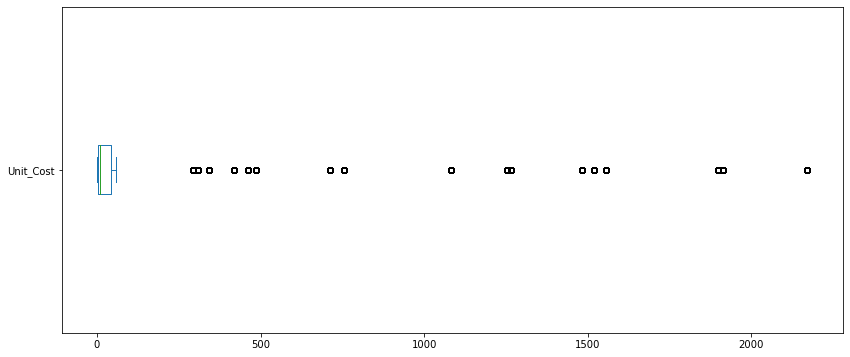

In [11]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

修改参数 `kind = 'density'` 便可以画出数据的分布图：

<AxesSubplot:ylabel='Density'>

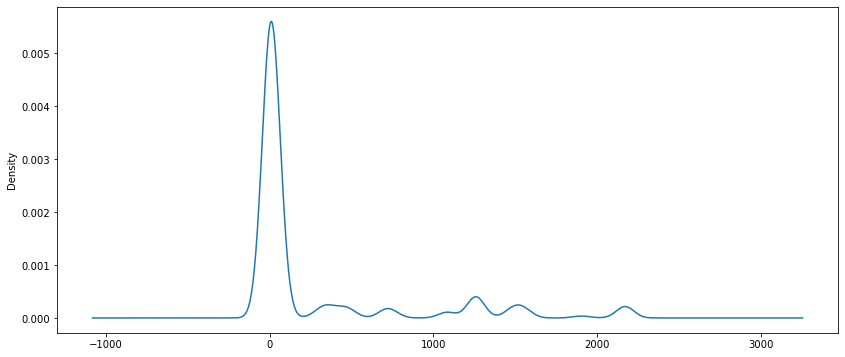

In [12]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde

并且我们也可以像使用 `matplotlib` 一样在图像中添加其他的内容：

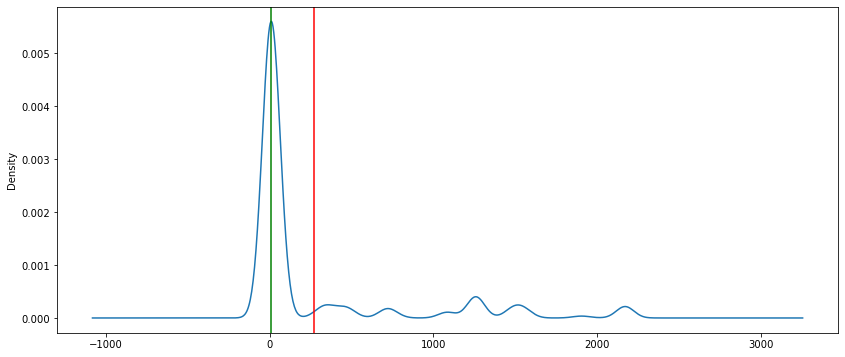

In [13]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

`DataFrame.plot()` 中的 `kind` 参数共有如下几种类型：
- ‘line’ : 线图（默认）
- ‘bar’ : 垂直条形图
- ‘barh’ : 水平条形图
- ‘hist’ : 直方图
- ‘box’ : 箱形图
- ‘kde’ : 核密度估计图
- ‘density’ : 与 “kde” 相同
- ‘area’ : 面积图
- ‘pie’ : 饼图
- ‘scatter’ : 散点图（仅限 DataFrame）
- ‘hexbin’ : 六角饼图（仅限 DataFrame）

Text(0, 0.5, 'Number of Sales')

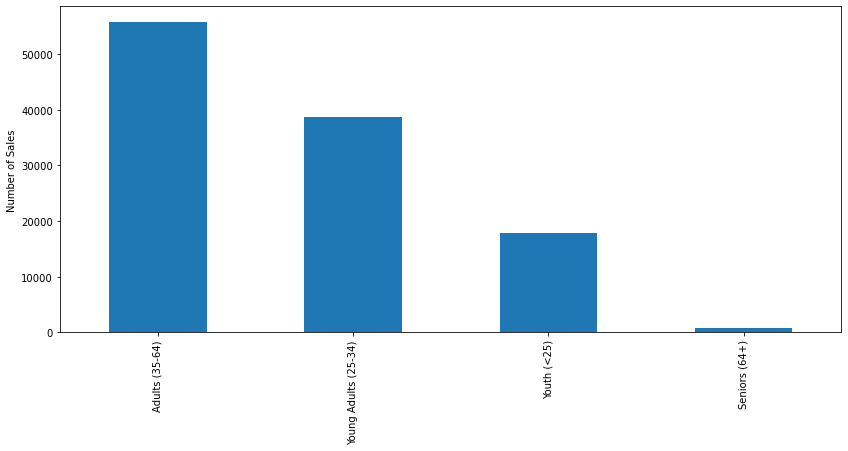

In [17]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

<AxesSubplot:ylabel='Age_Group'>

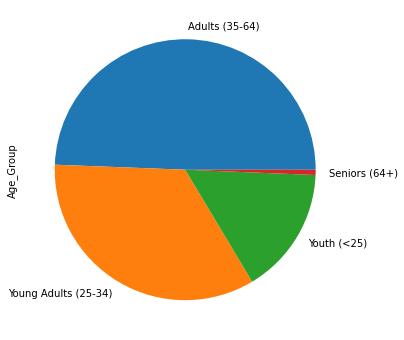

In [15]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

![](./pics/green.png)
## 4. 特征间的关系

通常在做数据分析之前，我们也会关系数据之间是否相关，这里使用函数 `corr()` （correlation 的缩写）。

In [18]:
corr = sales.corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


这样看似乎比较复杂，我们可以使用色谱图对其进行可视化：

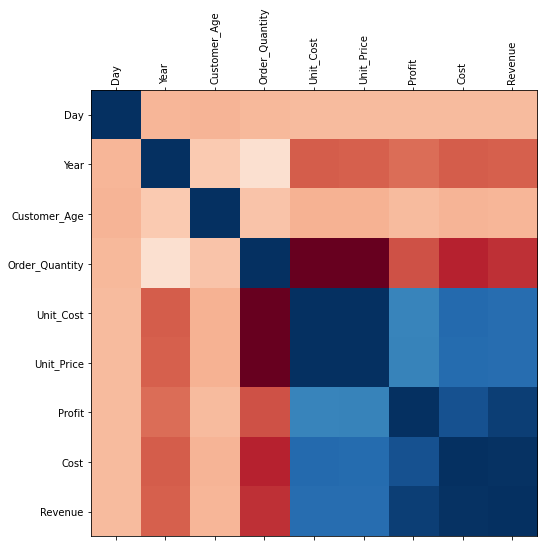

In [19]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

这上图中，颜色越蓝则特征之间的关系越大。对角线上是每个特征与本身的关系，因此是非常深的蓝色。

在上图的基础上，如果我们想要查看某两个特征之间的关系的话，还可以使用散点图。如果数据呈现出直线型，这说明这两者之间呈线性关系，如果如下图一样是比较散乱的，则没有太大的关系。

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

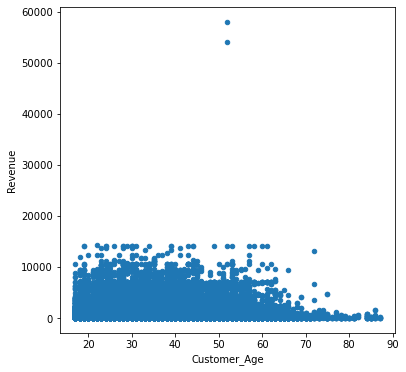

In [20]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

另外使用箱体图也可以直观的看出数据的之间的关系，比如从下面的年龄段和获利之间的关系中，我们就可以直观的看出不同年龄段的消费水平。

Text(0, 0.5, 'Profit')

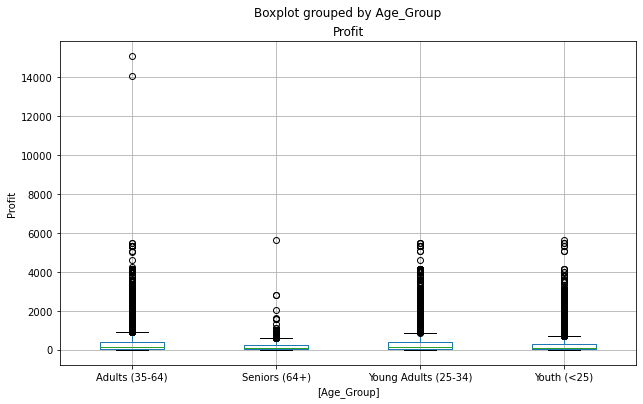

In [21]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

![](./pics/green.png)
## 5. 批量操作

**创建新的列**：

在数据量很多的情况下，我们使用 Excel 进行列操作往往会比较卡，但是使用 `pandas` 效果就会好很多：

比如说我们使用下面的公式来创建一个新列：

Calculated_Cost = Order_Quantity * Unit_Cost

In [24]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

**选择和查找**：

当我们要查找所哟来自 Kentucky 州的订单时，可以直接使用 `loc` 命令：

In [25]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,2.700,45
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,2.700,45
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22,142,96,238,5.950,96
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22,165,112,277,6.925,112
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,35,537,377,914,22.850,377
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,35,574,403,977,24.425,403
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30,32,22,54,1.350,22
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30,336,231,567,14.175,231
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30,16,11,27,0.675,11
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30,288,198,486,12.150,198


**获取成人 (35-64) 销售组的平均收入**：

In [26]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

**有多少记录属于年龄组青年 (<25) 或成人 (35-64)？**

In [27]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

**获取美国销售组 Adults (35-64) 的平均收入**

In [28]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

- 下篇：[]()